<a href="https://colab.research.google.com/github/mleyvaz/computacion-paralela/blob/main/betweenness_centrality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Computing betweenness centrality for:
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 2991
Average degree:   5.9820
	Parallel version
		Time: 4.8399 seconds
		Betweenness centrality for node 0: 0.04599
	Non-Parallel version
		Time: 4.5591 seconds
		Betweenness centrality for node 0: 0.04599

Computing betweenness centrality for:
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 5046
Average degree:  10.0920
	Parallel version
		Time: 5.9557 seconds
		Betweenness centrality for node 0: 0.00199
	Non-Parallel version
		Time: 5.7567 seconds
		Betweenness centrality for node 0: 0.00199

Computing betweenness centrality for:
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 2000
Average degree:   4.0000
	Parallel version
		Time: 4.3246 seconds
		Betweenness centrality for node 0: 0.01059
	Non-Parallel version
		Time: 4.0722 seconds
		Betweenness centrality for node 0: 0.01059



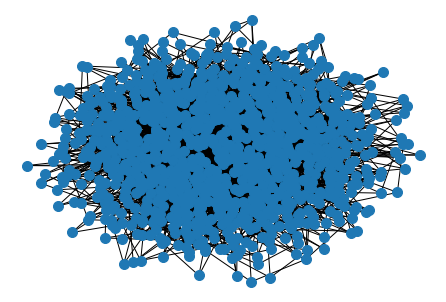

In [ ]:
from multiprocessing import Pool
import time
import itertools

import matplotlib.pyplot as plt
import networkx as nx


def chunks(l, n):
    """Divide a list of nodes `l` in `n` chunks"""
    l_c = iter(l)
    while 1:
        x = tuple(itertools.islice(l_c, n))
        if not x:
            return
        yield x


def betweenness_centrality_parallel(G, processes=None):
    """Parallel betweenness centrality  function"""
    p = Pool(processes=processes)
    node_divisor = len(p._pool) * 4
    node_chunks = list(chunks(G.nodes(), int(G.order() / node_divisor)))
    num_chunks = len(node_chunks)
    bt_sc = p.starmap(
        nx.betweenness_centrality_subset,
        zip(
            [G] * num_chunks,
            node_chunks,
            [list(G)] * num_chunks,
            [True] * num_chunks,
            [None] * num_chunks,
        ),
    )

    # Reduce the partial solutions
    bt_c = bt_sc[0]
    for bt in bt_sc[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c


G_ba = nx.barabasi_albert_graph(1000, 3)
G_er = nx.gnp_random_graph(1000, 0.01)
G_ws = nx.connected_watts_strogatz_graph(1000, 4, 0.1)
for G in [G_ba, G_er, G_ws]:
    print("")
    print("Computing betweenness centrality for:")
    print(nx.info(G))
    print("\tParallel version")
    start = time.time()
    bt = betweenness_centrality_parallel(G)
    print(f"\t\tTime: {(time.time() - start):.4F} seconds")
    print(f"\t\tBetweenness centrality for node 0: {bt[0]:.5f}")
    print("\tNon-Parallel version")
    start = time.time()
    bt = nx.betweenness_centrality(G)
    print(f"\t\tTime: {(time.time() - start):.4F} seconds")
    print(f"\t\tBetweenness centrality for node 0: {bt[0]:.5f}")
print("")

nx.draw(G_ba, node_size=100)
plt.show()